# Q4

import the libraries

In [125]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


read both images and plot them

grandpa image


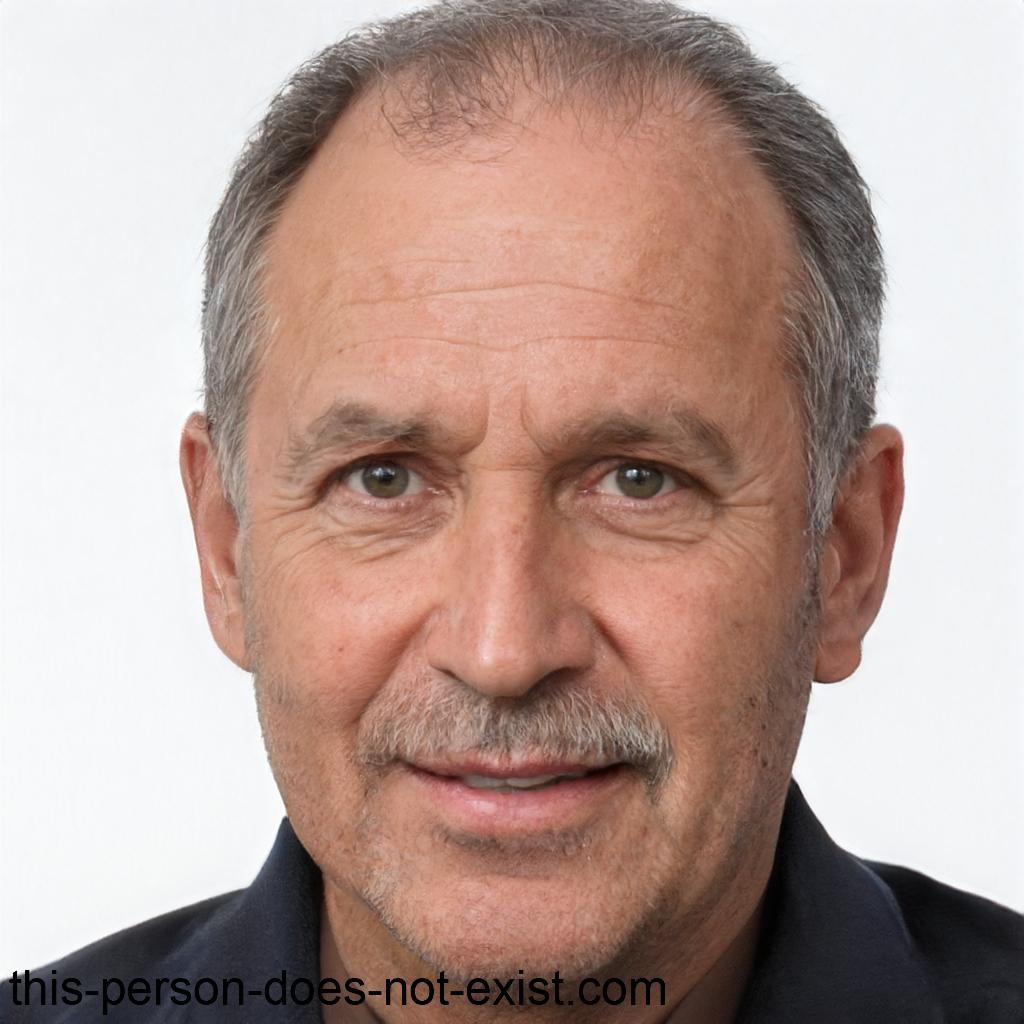

In [126]:
grandpa_jpg = 'images/q4_grandpa.jpeg'
room_jpg = 'images/q4_room.jpeg'
# for image_path in image_paths:
image_path = grandpa_jpg
grandpa = cv2.imread(grandpa_jpg)
if grandpa is None:
    print("Error: Image not loaded. Please check the path.")
else:
    print('grandpa image')
cv2_imshow(grandpa)
cv2.waitKey(0)
cv2.destroyAllWindows()


room image


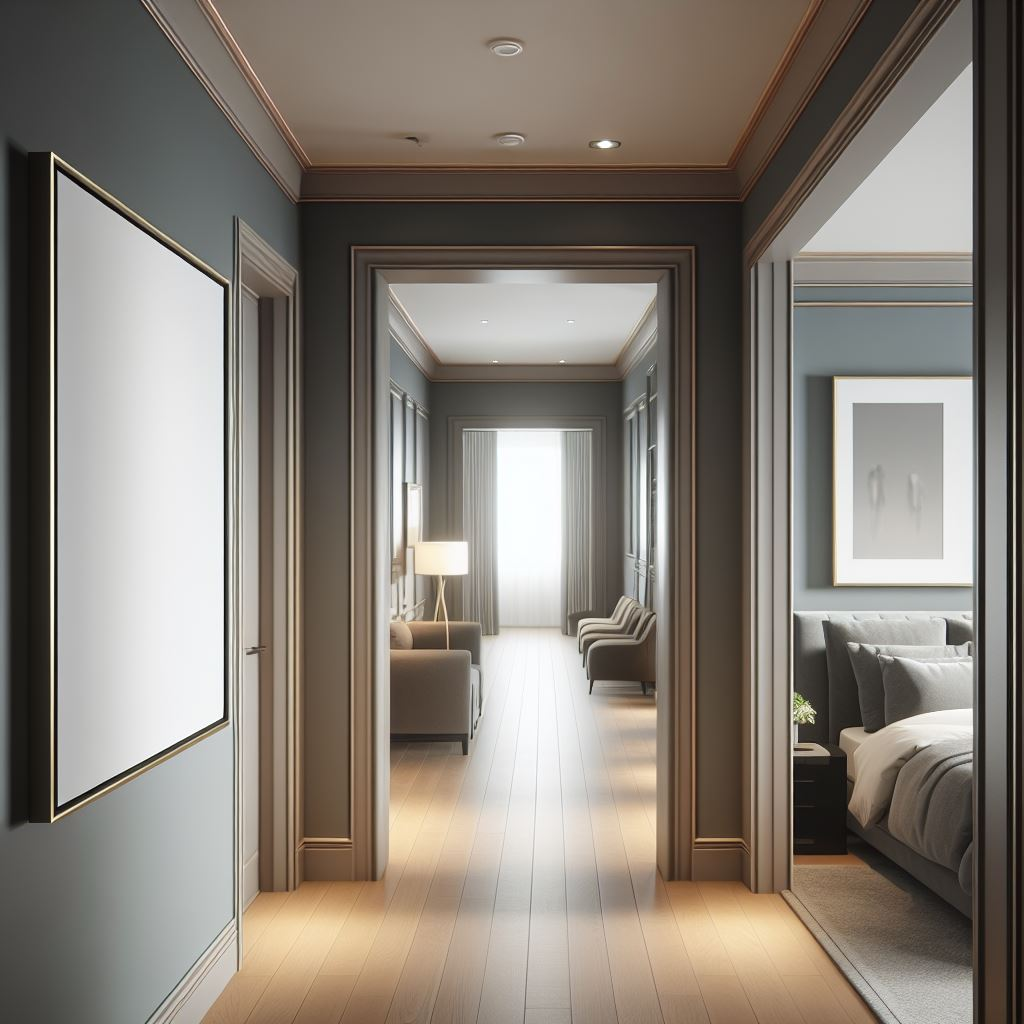

In [127]:
image_path = room_jpg
room = cv2.imread(room_jpg)
if room is None:
    print("Error: Image not loaded. Please check the path.")
else:
    print('room image')
cv2_imshow(room)
cv2.waitKey(0)
cv2.destroyAllWindows()


add black ribbon to grandpa image

In [128]:
grandpa.shape


(1024, 1024, 3)

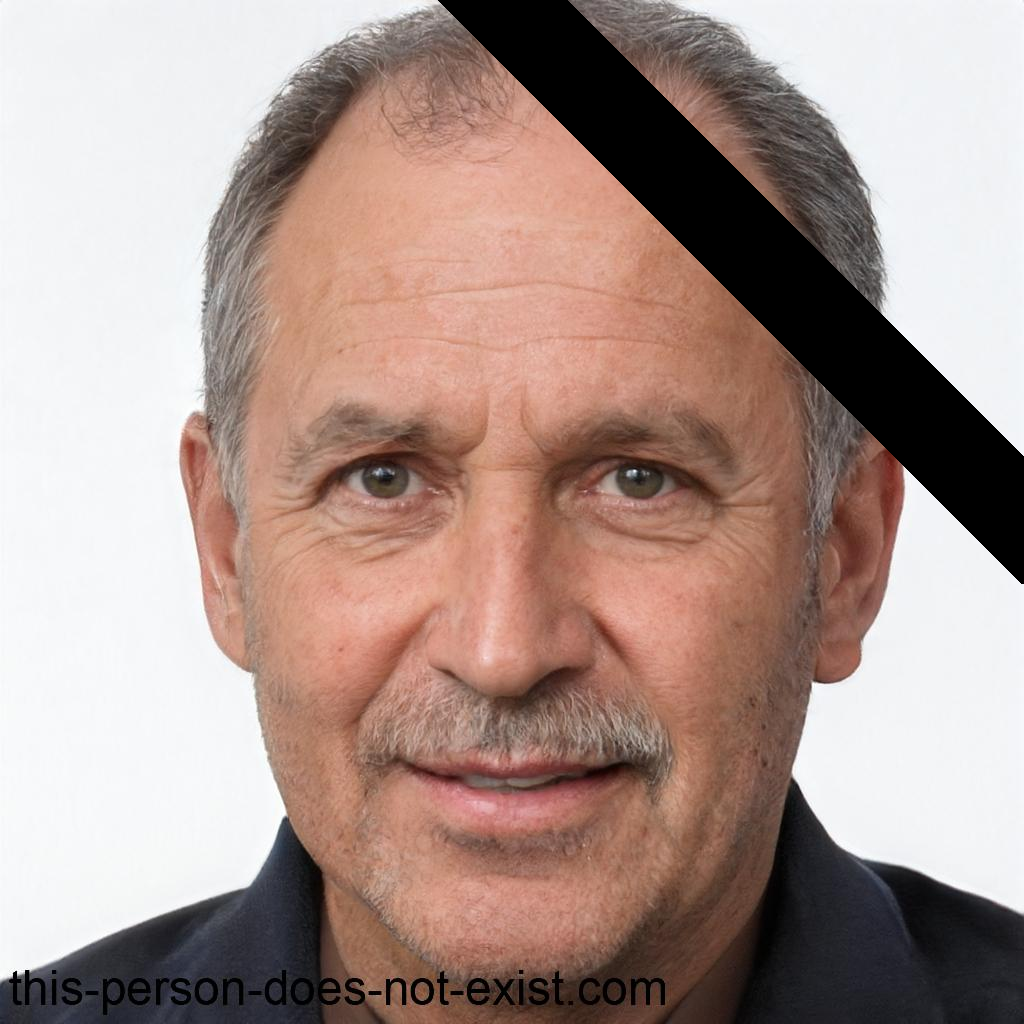

True

In [129]:
distance = 0
for i in range(0, 4 * int(grandpa.shape[0] / 7)):
  count = 0
  for j in range(3 * int( grandpa.shape[1] / 7), grandpa.shape[1]):
    if count < 130 and j + distance < grandpa.shape[1]:
      grandpa[i, j + distance] = [0, 0, 0]
      count += 1
  distance += 1
cv2_imshow(grandpa)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('grandpa_with_black_ribbon.jpg', grandpa)

define the coordinates of destination image

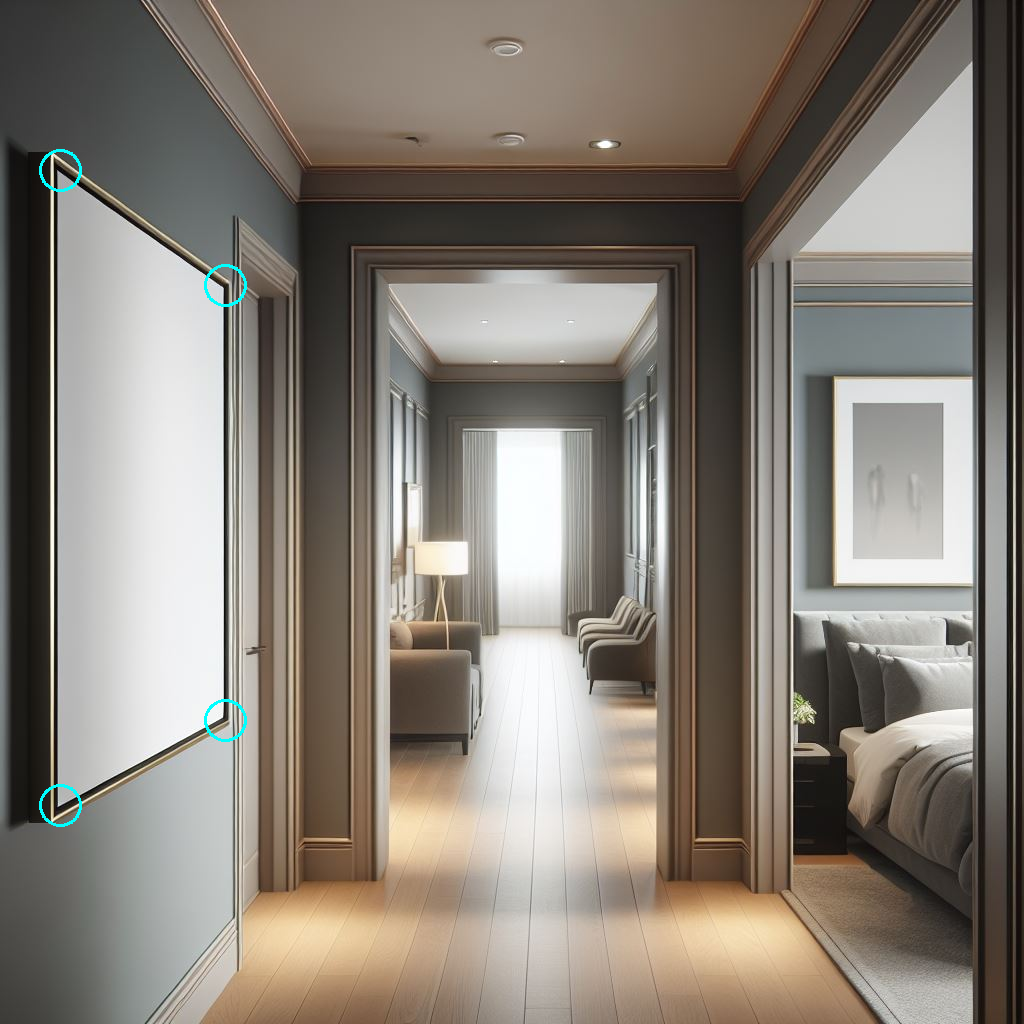

In [130]:
import copy
center_coordinates = [(60, 170), (225, 285), (60, 805), (225, 720)]
radius = 20
color = (255, 255, 0)
thickness = 2  # Pixel
room_with_circle = room.copy()
for center in center_coordinates:
  cv2.circle(room_with_circle, center, radius, color, thickness)

cv2_imshow(room_with_circle)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [131]:
print(center_coordinates)

[(60, 170), (225, 285), (60, 805), (225, 720)]


get the transform matrix

In [132]:
pts_src = np.array([
                    [0, 0],
                    [grandpa.shape[0], 0],
                    [0, grandpa.shape[1] - 1],
                    [grandpa.shape[0] - 1, grandpa.shape[1] - 1],
                    ], dtype='float32')

pts_dst = np.array([[60, 170], [225, 285], [60, 805], [225, 720]], dtype = 'float32')
matrix = cv2.getPerspectiveTransform(pts_src, pts_dst)
transformed_image = cv2.warpPerspective(grandpa, matrix, (room.shape[0], room.shape[1]))

# Create a mask from the warped image
mask = cv2.warpPerspective(np.ones_like(grandpa, dtype=np.uint8) * 255, matrix, (room.shape[1], room.shape[0]))
# Convert mask to boolean
mask_bool = mask.astype(bool)
# Blend the warped image into the background
result = room.copy()
result[mask_bool] = transformed_image[mask_bool]


apply the transform and plot the result

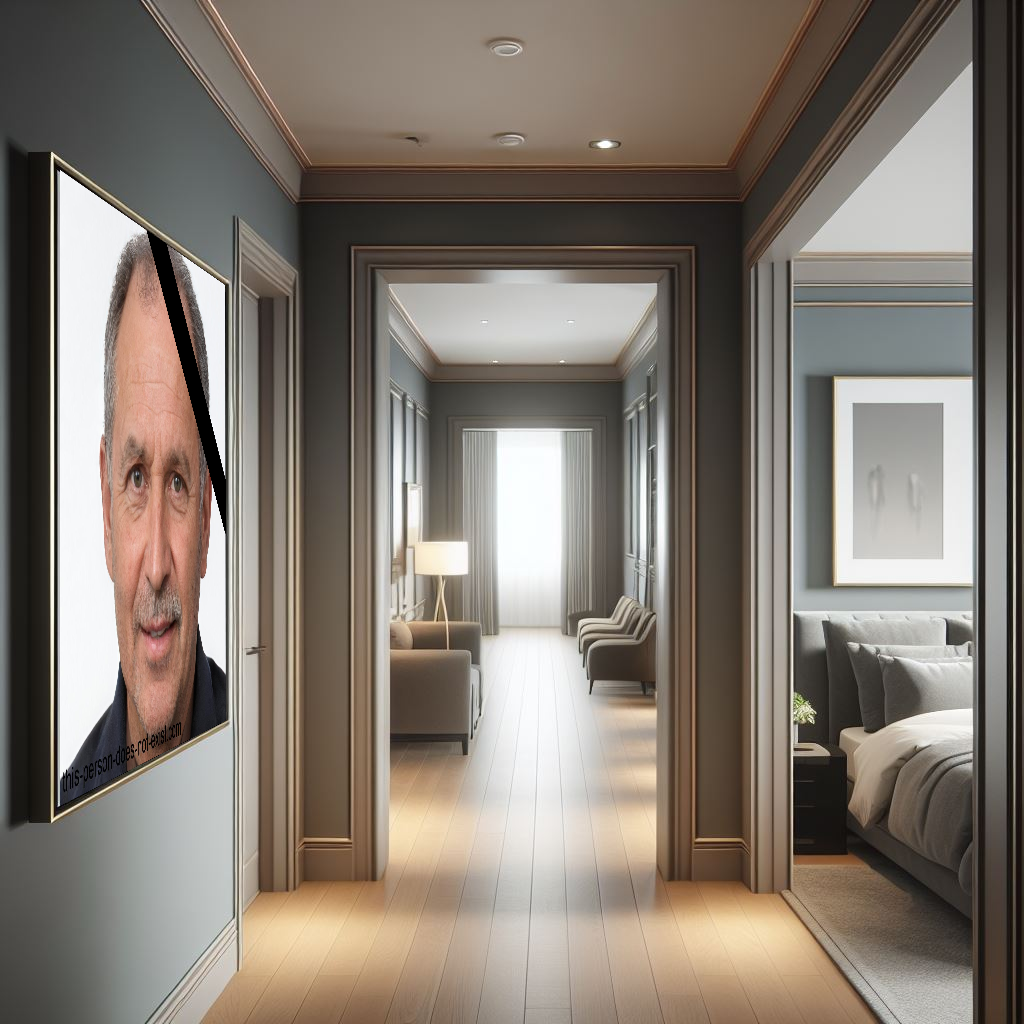

In [133]:

# Show the result
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()